# Partie analyse de données

In [2]:
# Functions imports

import tqdm as notebook_tqdm

import importlib
import functions
from dateutil import tz
import pandas as pd
from scipy import stats

importlib.reload(functions)
from functions import *

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## Ajout des fichiers


In [ ]:
x = pd.read_csv("../data/raw/X_train_Wwou3IE.csv")  # 10605 rows × 10 columns
x_challenge = pd.read_csv("../data/raw/X_test_GgyECq8.csv")  # 4942 rows × 10 columns
y = pd.read_csv("../data/raw/y_train_jJtXgMX.csv")  # 10605 rows × 2 columns

# Traitement des données manquantes


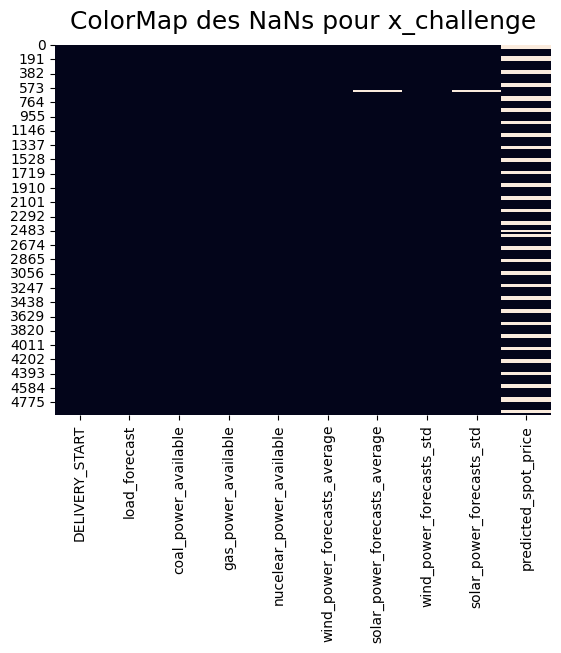

In [ ]:
# Première visualisation des NaNs

nan_colormap(x, "ColorMap des NaNs pour x")
nan_colormap(x_challenge, "ColorMap des NaNs pour x_challenge")
# nan_colormap(y, 'ColorMap des NaNs pour y')

# Il y a des NaNs dans x et x_challenge

# spot_columns(x_challenge)
# spot_columns(x_challenge)

Remplacement des NaNs dans x_challenge et x


In [ ]:
# Pour remplacer les données manquantes nous allons utiliser la moyenne de la colonne.
# Si c'est guez on pourra utiliser la dépendance temporelle pour afiner la moyenne des deux premières.

# Pour predicted_spot_price il est peut être pertinent de prédire les données avec un modèle de ML
# comme il en manque beaucoup.

x = nan_identer(x)
x_challenge = nan_identer(x_challenge)

# Analyse de la variable temporelle 'DELIVERY_START'


In [ ]:
# Comme y'a beaucoup d'information contenue dans la colonne 'DELIVERY_START', nous créons
# plusieurs colonnes permettant de prendre toutes ces informations en compte

# FAIRE RUN ALL SUR CETTE CELL À CHAQUES FOIS SINON ÇA FAIT DES ERREURS


# Extraction des caractéristiques temporelles
def add_time_features(
    df: pd.DataFrame, time_column: str
):  # Je fais une fonction car il y a plusieurs DataFrame

    df[time_column] = pd.to_datetime(
        df[time_column], errors="coerce", utc=True
    )  # Important pour pouvoir utiliser .dt
    if df[time_column].isnull().any():
        print(
            f"Warning: Some dates in column '{time_column}' could not be converted and are set to NaT"
        )

    # Gros problème, au niveau des changements d'heure, au lieu d'avoir '+1' dans DELIVERY_START
    # on a '+2' et pyhton comprend plus que c'est un date et fait crasher la fonction
    # En cherchant sur internet, j'ai trouvé qu'il fallait rajouté 'utc' dans l'argument de la fonction
    # datetime. Je rajoute une ligne pour faire une conversion en fuseau horaire local.

    # df[time_column] = df[time_column].dt.tz_convert('Europe/Paris') # Pas forcément utile

    df["hour"] = df[time_column].dt.hour
    df["day_of_week"] = df[time_column].dt.dayofweek
    df["month"] = df[time_column].dt.month
    df["is_weekend"] = df[time_column].dt.dayofweek > 5
    df["is_peak_hour"] = df[time_column].dt.hour.isin(range(7, 19))

    df["is_weekend"] = df["is_weekend"].astype(
        int
    )  # Pour avoir des 1/0 et pas un Boolean
    df["is_peak_hour"] = df["is_peak_hour"].astype(int)

    return df


# Appliquer les transformations sur x et x_challenge
x = add_time_features(x, "DELIVERY_START")
x_challenge = add_time_features(x_challenge, "DELIVERY_START")

x.head(1)

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,hour,day_of_week,month,is_weekend,is_peak_hour
0,2022-01-01 01:00:00+00:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,140.256024,1,5,1,0,0


# Exploratory Data Analysis (EDA)

Recherche de valeurs aberrantes (Z-score method)

In [ ]:
# Calculer le score Z revient à détecter les valeurs qui s'écartent de la moyenne de plus de quelques écarts-types.

columns = ['DELIVERY_START', 'hour', 'day_of_week', 'month', 'is_weekend', 'is_peak_hour']

x_numeric = x.drop(columns=columns, axis=1)

# spot_deviants_z1(x_numeric)

# Mouais ça marche pas trop, quand je regarde les valeurs dans le csv, y'a rien d'abberant ...

Analyse univariée


Statistiques descriptives pour les variables numériques :
       load_forecast  coal_power_available  gas_power_available  \
count   10605.000000          10605.000000         10605.000000   
mean    53725.132968           2819.781592         11463.220671   
std     10567.900793            495.080242           483.776341   
min     30515.000000           1646.000000          9769.000000   
25%     46251.000000           2226.000000         11140.000000   
50%     53725.132968           2806.000000         11487.000000   
75%     60573.000000           3386.000000         11945.000000   
max     85145.000000           3391.000000         11963.000000   

       nucelear_power_available  wind_power_forecasts_average  \
count              10605.000000                  10605.000000   
mean               35393.282252                   4512.989415   
std                 7619.460863                   3345.626843   
min                22285.000000                    592.000000   
25%         

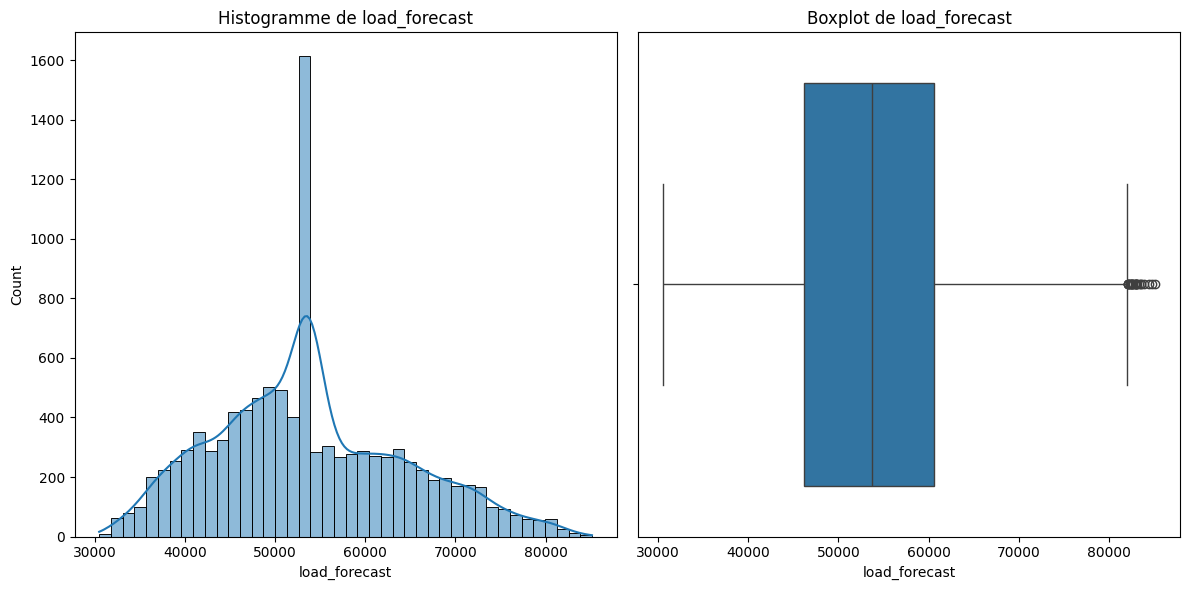

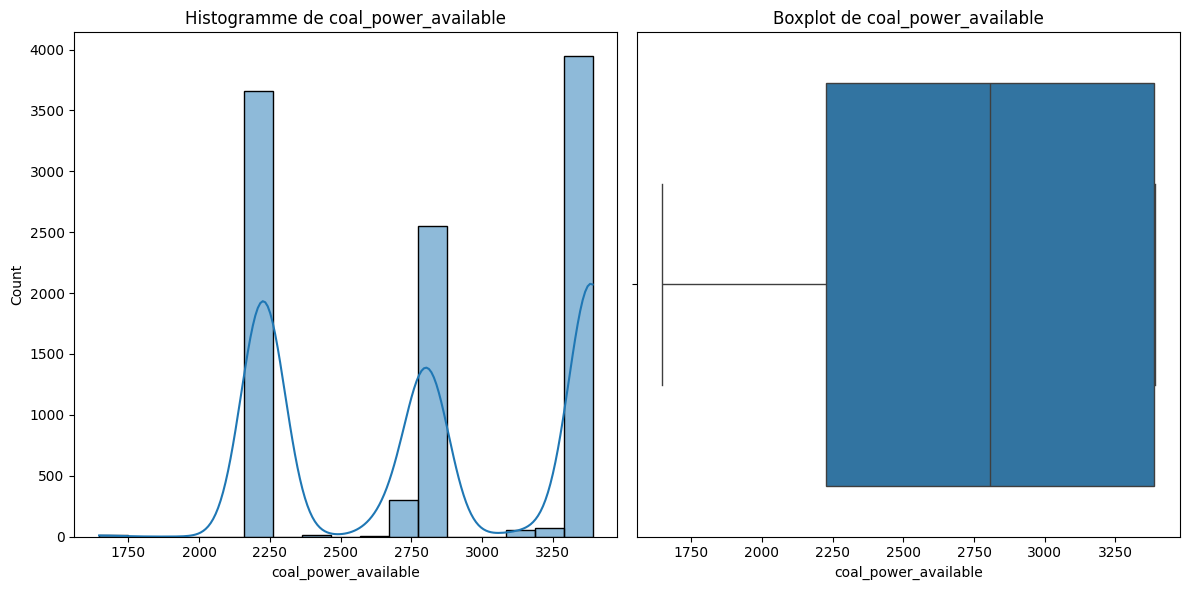

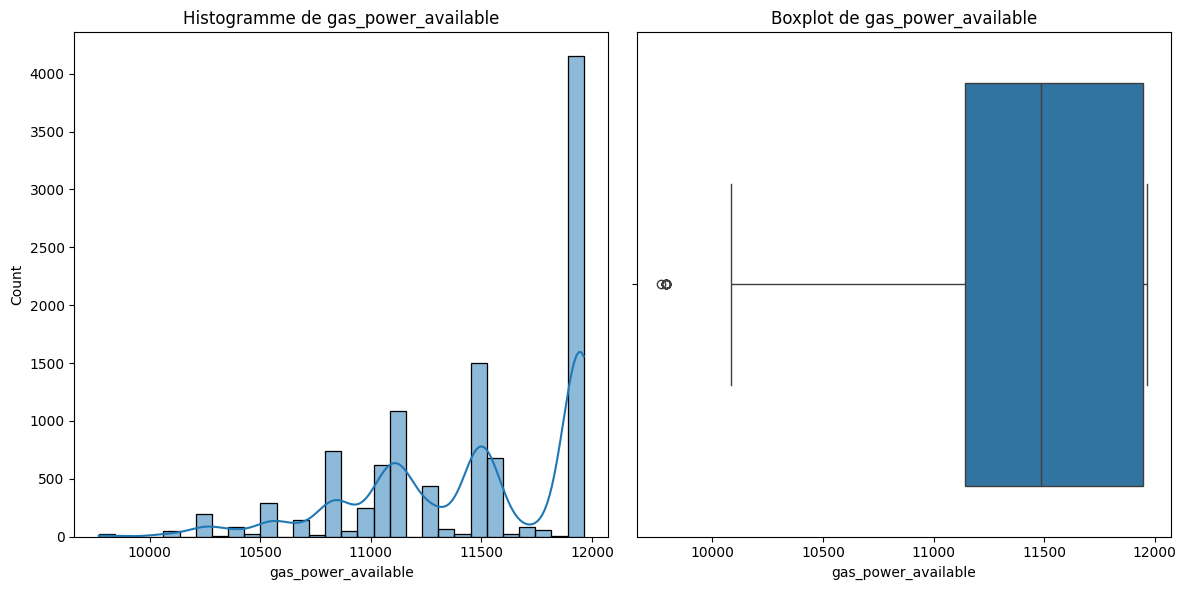

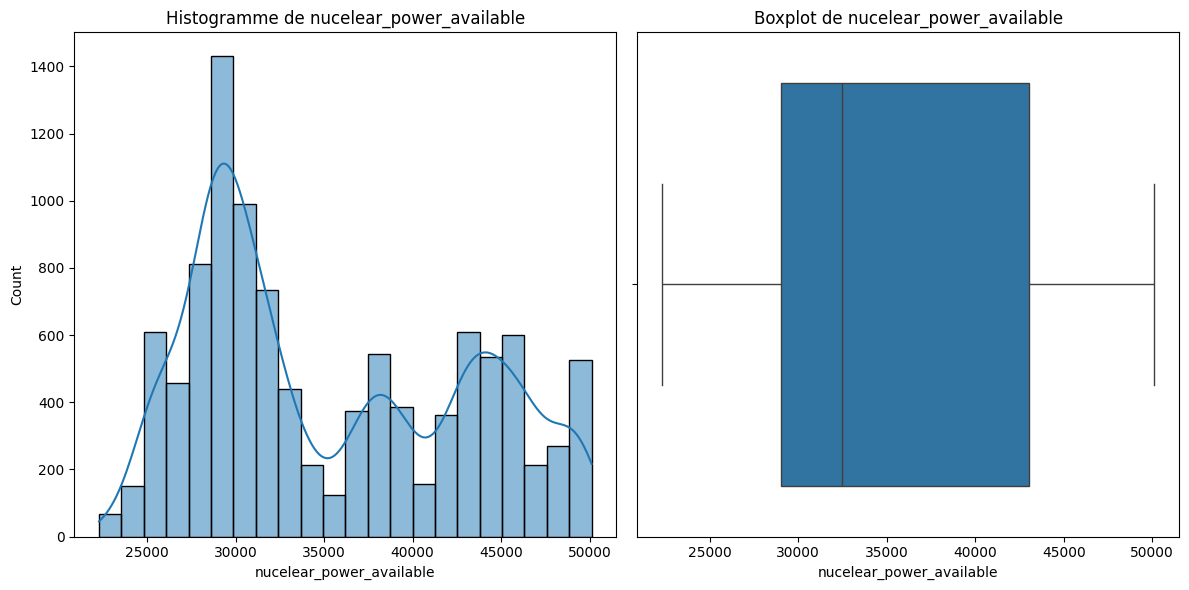

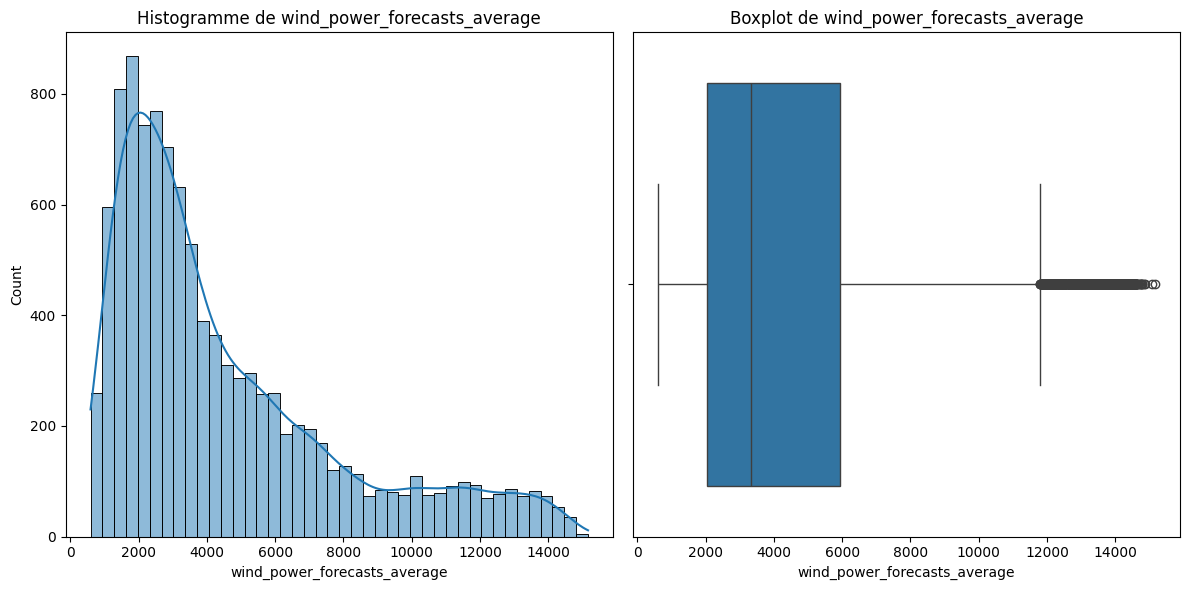

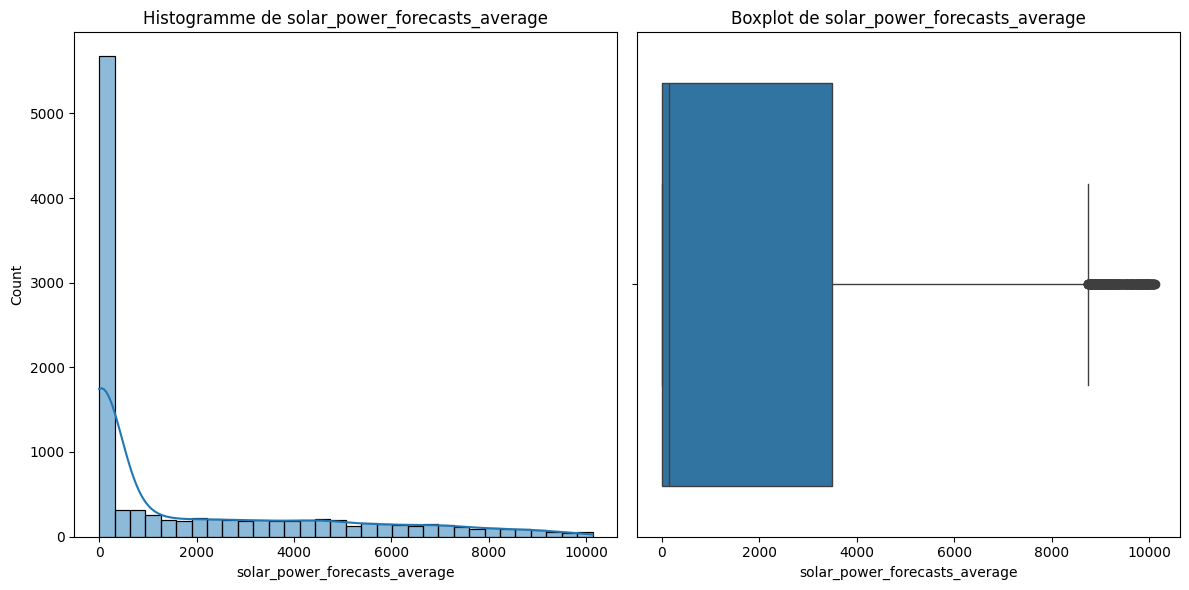

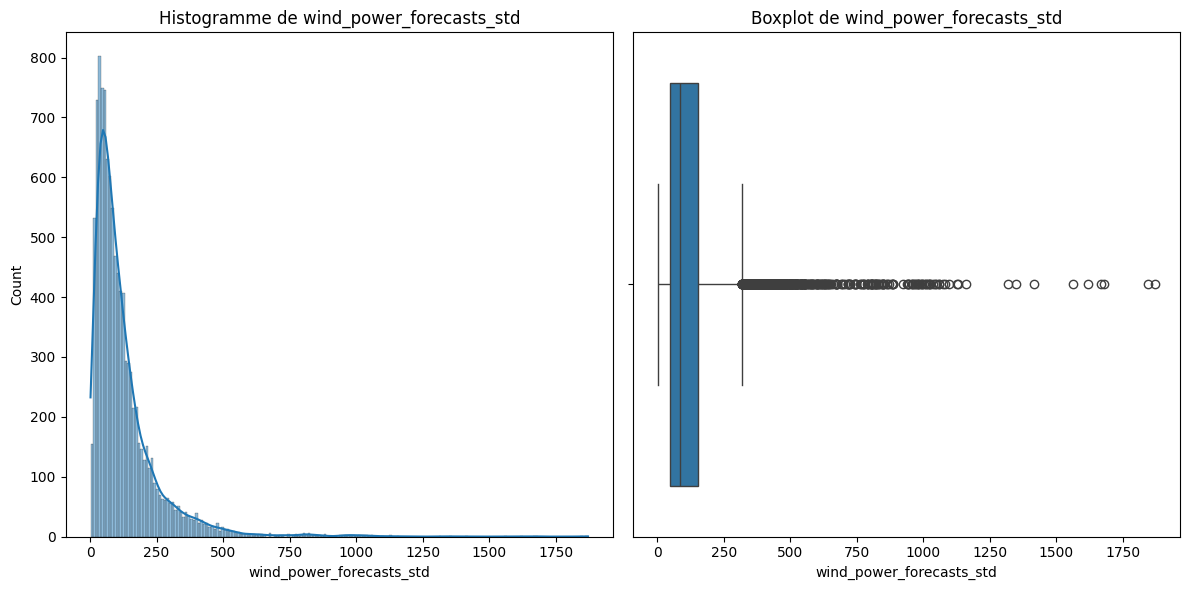

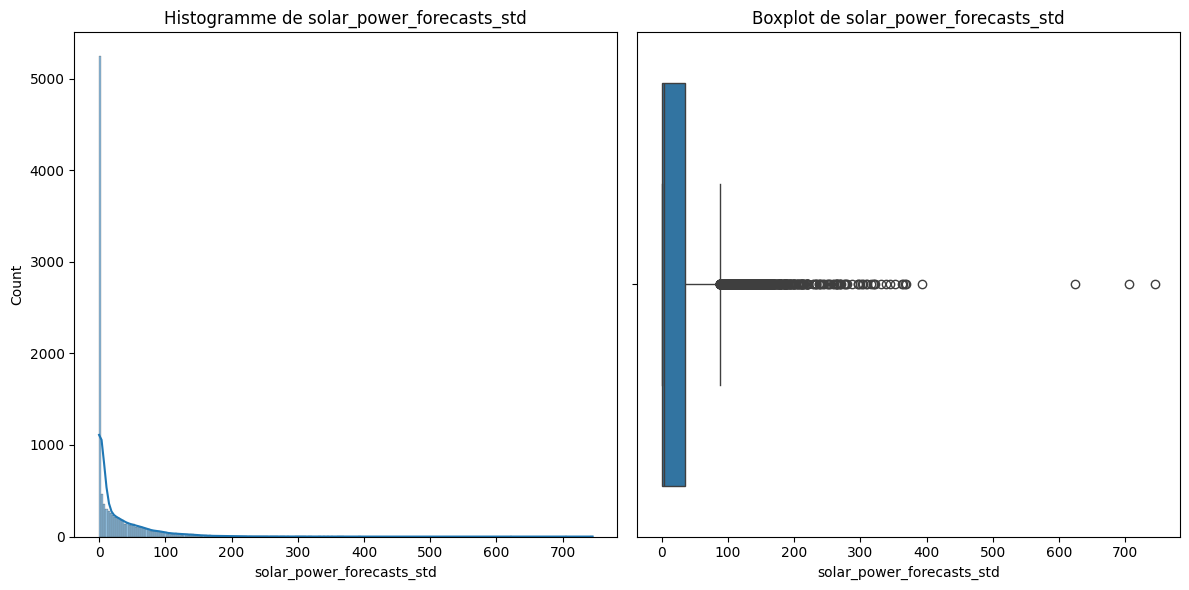

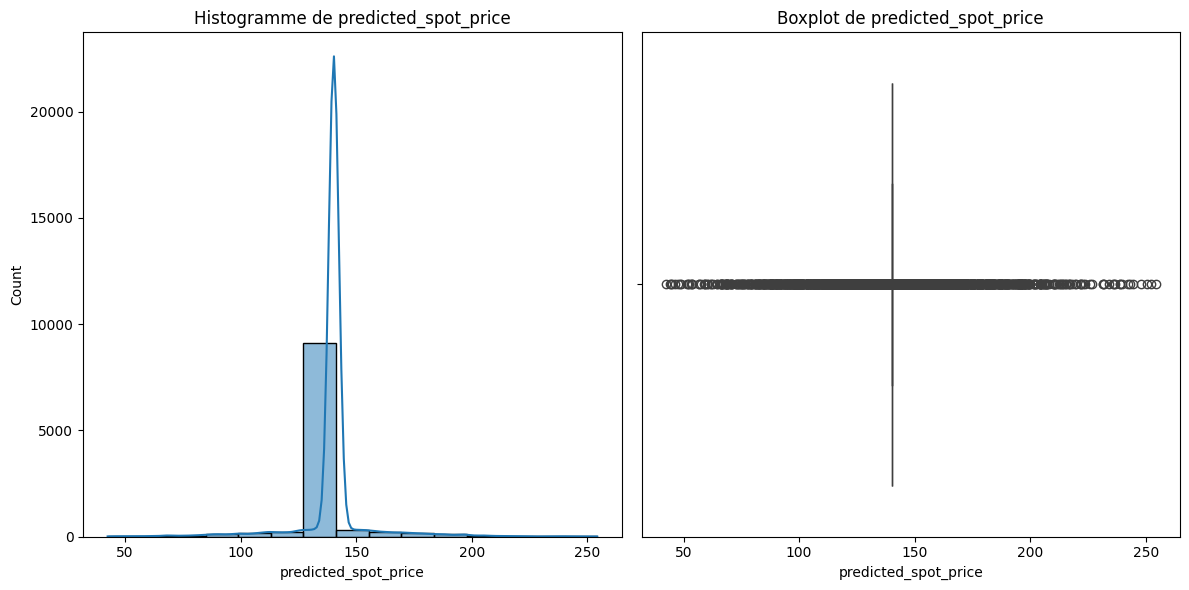

In [ ]:
univariate_analysis(x_numeric)

# On voit mieux les valeurs aberrantes avec ça

# Valeurs aberrantes dans : 
#     - load_forecast
#     - solar_power_forecast_average
#     - solar_power_forecast_std
#     - predicted_spot_price

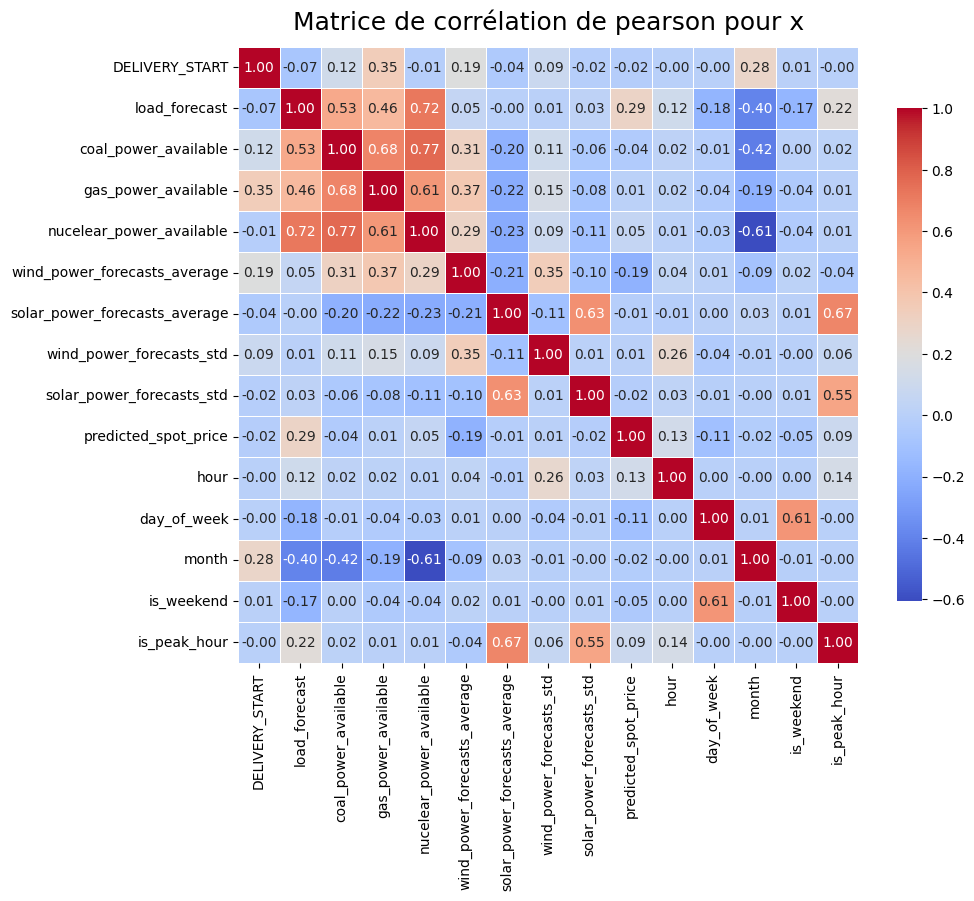

In [ ]:
# bivariate_analysis(x)

correlation_matrix(x, 'pearson', 'Matrice de corrélation de pearson pour x')

Export des DataFrames

In [ ]:
x.to_csv('../data/processed/x_processed.csv')
x_challenge.to_csv('../data/processed/x_challenge_processed.csv')